In [25]:
# Installation des bibliothèques nécessaires
# Décommentez et exécutez ces lignes si vous n'avez pas déjà installé ces bibliothèques
# !pip install folium
# !pip install geopandas
# !pip install matplotlib
# !pip install plotly
# !pip install pandas


In [26]:
# Importation des bibliothèques
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
import plotly.express as px

# Pour éviter les warnings
import warnings
warnings.filterwarnings('ignore')


In [38]:
# Création d'un DataFrame avec quelques villes françaises (incluant Rennes)
data = {
    'Ville': ['Paris', 'Marseille', 'Lyon', 'Toulouse', 'Nice', 'Nantes', 'Strasbourg', 'Montpellier', 'Bordeaux', 'Lille', 'Rennes'],
    'Latitude': [48.8566, 43.2965, 45.7640, 43.6047, 43.7102, 47.2184, 48.5734, 43.6112, 44.8378, 50.6292, 48.1173],
    'Longitude': [2.3522, 5.3698, 4.8357, 1.4442, 7.2620, -1.5536, 7.7521, 3.8767, -0.5792, 3.0573, -1.6778],
    'Population': [2187526, 863310, 516092, 479553, 340017, 309346, 280966, 282143, 254436, 232787, 216815],
    'Catégorie': ['Capitale', 'Métropole', 'Métropole', 'Métropole', 'Métropole', 'Métropole', 'Métropole', 'Métropole', 'Métropole', 'Métropole', 'Métropole']
}

df = pd.DataFrame(data)
df.head(12)


,Ville,Latitude,Longitude,Population,Catégorie
0,Paris,48.8566,2.3522,2187526,Capitale
1,Marseille,43.2965,5.3698,863310,Métropole
2,Lyon,45.7640,4.8357,516092,Métropole
3,Toulouse,43.6047,1.4442,479553,Métropole
4,Nice,43.7102,7.2620,340017,Métropole
5,Nantes,47.2184,-1.5536,309346,Métropole
6,Strasbourg,48.5734,7.7521,280966,Métropole
7,Montpellier,43.6112,3.8767,282143,Métropole
8,Bordeaux,44.8378,-0.5792,254436,Métropole
9,Lille,50.6292,3.0573,232787,Métropole


In [29]:
# Création d'une carte centrée sur la France
map_center = [46.603354, 1.888334]  # Centre approximatif de la France
m = folium.Map(location=map_center, zoom_start=6)

# Ajout des marqueurs pour chaque ville
for idx, row in df.iterrows():
    popup_text = f"""
    <b>{row['Ville']}</b><br>
    Population: {row['Population']:,}<br>
    Catégorie: {row['Catégorie']}
    """
    
    # Différencier Paris et Rennes des autres villes
    if row['Ville'] == 'Paris':
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=popup_text,
            icon=folium.Icon(color='red', icon='star')
        ).add_to(m)
    elif row['Ville'] == 'Rennes':
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=popup_text,
            icon=folium.Icon(color='green', icon='info-sign')
        ).add_to(m)
    else:
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=popup_text,
            icon=folium.Icon(color='blue', icon='info-sign')
        ).add_to(m)

# Affichage de la carte
m


In [30]:
# Création d'une carte avec clusters
m_cluster = folium.Map(location=map_center, zoom_start=6)

# Ajouter un cluster de marqueurs
marker_cluster = MarkerCluster().add_to(m_cluster)

# Ajouter les marqueurs au cluster
for idx, row in df.iterrows():
    popup_text = f"""
    <b>{row['Ville']}</b><br>
    Population: {row['Population']:,}<br>
    Catégorie: {row['Catégorie']}
    """
    
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=popup_text
    ).add_to(marker_cluster)

# Affichage de la carte
m_cluster


In [31]:
# Création d'une carte avec des cercles proportionnels à la population
m_circles = folium.Map(location=map_center, zoom_start=6)

# Ajouter des cercles pour chaque ville, avec rayon proportionnel à la population
for idx, row in df.iterrows():
    popup_text = f"""
    <b>{row['Ville']}</b><br>
    Population: {row['Population']:,}<br>
    Catégorie: {row['Catégorie']}
    """
    
    # Rayon proportionnel à la racine carrée de la population pour une meilleure visualisation
    radius = (row['Population'] / 10000) ** 0.5 * 1000
    
    # Couleur spéciale pour Rennes
    if row['Ville'] == 'Rennes':
        color = 'green'
    elif row['Ville'] == 'Paris':
        color = 'red'
    else:
        color = 'blue'
    
    folium.Circle(
        location=[row['Latitude'], row['Longitude']],
        radius=radius,  # en mètres
        popup=popup_text,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.4
    ).add_to(m_circles)

# Affichage de la carte
m_circles


In [32]:
# Ajout d'une colonne pour mettre en évidence Rennes
df['Mise_en_evidence'] = ['Paris' if ville == 'Paris' else 'Rennes' if ville == 'Rennes' else 'Autre ville' for ville in df['Ville']]

# Création d'une carte avec Plotly Express
fig = px.scatter_geo(
    df, 
    lat='Latitude', 
    lon='Longitude',
    hover_name='Ville',
    size='Population',  # Taille des points proportionnelle à la population
    color='Mise_en_evidence',  # Couleur basée sur notre nouvelle colonne
    projection='natural earth',
    scope='europe',  # Nous nous concentrons sur l'Europe
    size_max=25,  # Taille maximale des points
    hover_data=['Population'],  # Données supplémentaires à afficher au survol
    color_discrete_map={'Paris': 'red', 'Rennes': 'green', 'Autre ville': 'blue'}
)

# Centrer la vue sur la France
fig.update_geos(
    center=dict(lon=2.3522, lat=46.8),
    lataxis_range=[41, 52],
    lonaxis_range=[-5, 10]
)

# Ajuster le titre
fig.update_layout(
    title='Principales villes françaises par population (Rennes en vert)',
    title_x=0.5  # Centrer le titre
)

fig.show()


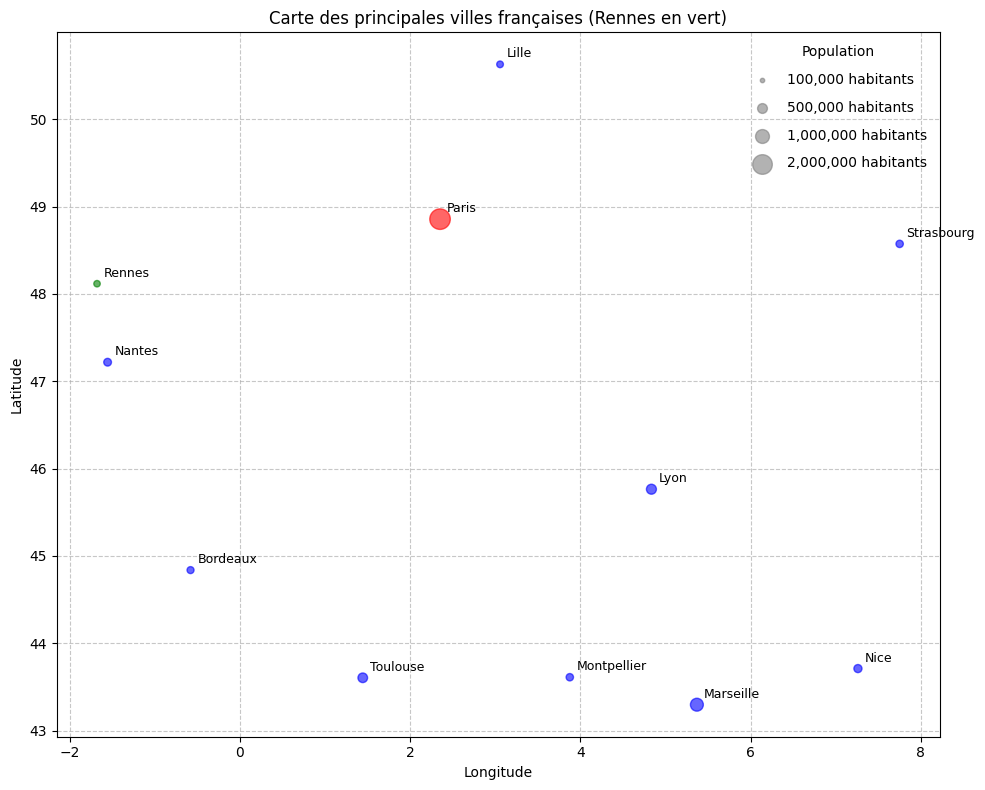

In [33]:
# Création d'une carte simple avec Matplotlib
plt.figure(figsize=(10, 8))

# Définir des couleurs pour chaque ville
colors = []
for ville in df['Ville']:
    if ville == 'Paris':
        colors.append('red')
    elif ville == 'Rennes':
        colors.append('green')
    else:
        colors.append('blue')

# Tracer les points des villes
plt.scatter(df['Longitude'], df['Latitude'], s=df['Population']/10000, alpha=0.6, c=colors)

# Ajouter des étiquettes pour chaque ville
for i, row in df.iterrows():
    plt.annotate(row['Ville'], 
                 (row['Longitude'], row['Latitude']),
                 fontsize=9,
                 xytext=(5, 5),
                 textcoords='offset points')

# Ajouter un titre et des étiquettes d'axes
plt.title('Carte des principales villes françaises (Rennes en vert)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Ajouter une légende pour les tailles
sizes = [100000, 500000, 1000000, 2000000]
for size in sizes:
    plt.scatter([], [], s=size/10000, c='gray', alpha=0.6, label=f'{size:,} habitants')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Population')

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [34]:
# Filtrer les villes de l'Ouest (longitude négative)
villes_ouest = df[df['Longitude'] < 0].copy()
villes_ouest


,Ville,Latitude,Longitude,Population,Catégorie,Mise_en_evidence
5,Nantes,47.2184,-1.5536,309346,Métropole,Autre ville
8,Bordeaux,44.8378,-0.5792,254436,Métropole,Autre ville
10,Rennes,48.1173,-1.6778,216815,Métropole,Rennes


In [35]:
# Création d'une carte focalisée sur l'Ouest de la France
m_ouest = folium.Map(location=[47.2, -1.5], zoom_start=7)  # Centré approximativement sur Nantes

# Ajouter des marqueurs pour les villes de l'Ouest
for idx, row in villes_ouest.iterrows():
    popup_text = f"""
    <b>{row['Ville']}</b><br>
    Population: {row['Population']:,}<br>
    Catégorie: {row['Catégorie']}
    """
    
    # Mise en évidence spéciale pour Rennes
    if row['Ville'] == 'Rennes':
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=popup_text,
            icon=folium.Icon(color='green', icon='star', prefix='fa')
        ).add_to(m_ouest)
        
        # Ajouter un cercle autour de Rennes
        folium.Circle(
            location=[row['Latitude'], row['Longitude']],
            radius=30000,  # 30 km
            color='green',
            fill=True,
            fill_opacity=0.2,
            popup='Zone d\'influence de Rennes (30 km)'
        ).add_to(m_ouest)
    else:
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=popup_text,
            icon=folium.Icon(color='blue', icon='info-sign')
        ).add_to(m_ouest)

# Ajouter une ligne entre Rennes et les autres villes de l'Ouest
rennes_coords = [48.1173, -1.6778]  # Coordonnées de Rennes

for idx, row in villes_ouest.iterrows():
    if row['Ville'] != 'Rennes':
        folium.PolyLine(
            locations=[rennes_coords, [row['Latitude'], row['Longitude']]],
            color='purple',
            weight=2,
            opacity=0.7,
            popup=f"Distance Rennes - {row['Ville']}"
        ).add_to(m_ouest)

# Affichage de la carte
m_ouest


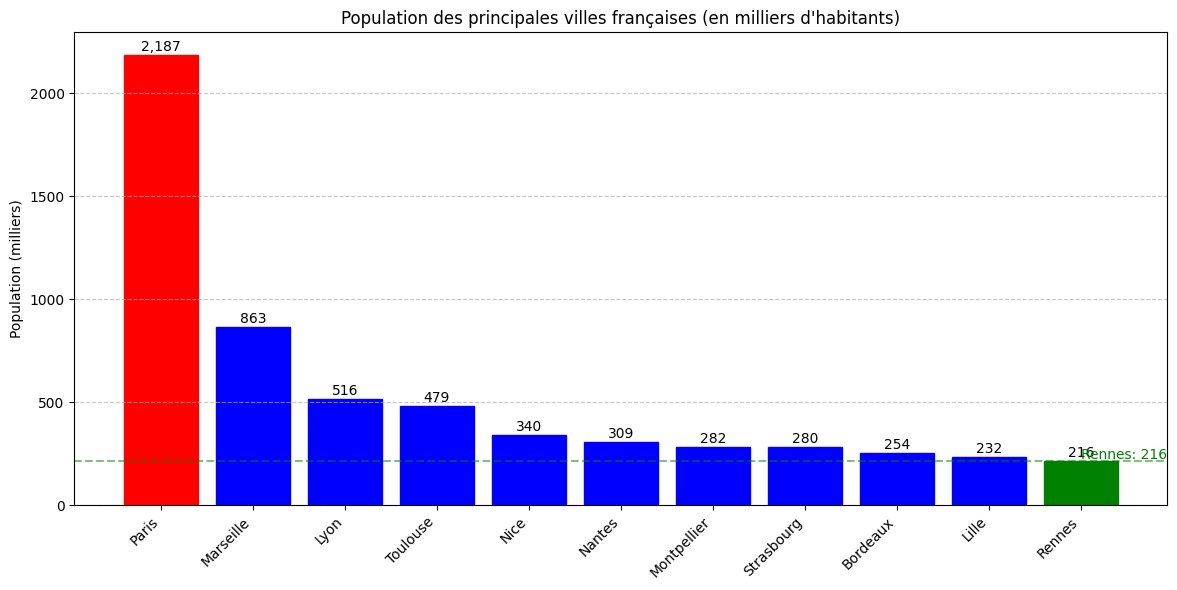

In [36]:
# Graphique comparatif des populations
plt.figure(figsize=(12, 6))

# Trier par population décroissante
df_sorted = df.sort_values('Population', ascending=False)

# Créer le graphique à barres
bars = plt.bar(df_sorted['Ville'], df_sorted['Population'] / 1000)

# Colorer la barre de Rennes en vert
for i, ville in enumerate(df_sorted['Ville']):
    if ville == 'Rennes':
        bars[i].set_color('green')
    elif ville == 'Paris':
        bars[i].set_color('red')
    else:
        bars[i].set_color('blue')

plt.title('Population des principales villes françaises (en milliers d\'habitants)')
plt.ylabel('Population (milliers)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajouter les valeurs au-dessus des barres
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
            f'{int(height):,}',
            ha='center', va='bottom', rotation=0)

# Ajouter une ligne horizontale pour la population de Rennes
rennes_pop = df[df['Ville'] == 'Rennes']['Population'].values[0] / 1000
plt.axhline(y=rennes_pop, color='green', linestyle='--', alpha=0.5)
plt.text(len(df) - 1, rennes_pop + 10, f'Rennes: {int(rennes_pop):,}', color='green')

plt.tight_layout()
plt.show()
